In [408]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing and EDA

In [409]:
df = pd.read_csv("train.csv")
df.head(-5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165024,165024,15734886,Martin,592,Germany,Female,33.0,3,110993.29,2,1.0,1.0,176747.66,1
165025,165025,15687079,T'ang,635,France,Female,38.0,9,0.00,2,1.0,1.0,167558.27,0
165026,165026,15617454,Ifeatu,724,Germany,Male,59.0,2,68999.66,1,1.0,1.0,66879.27,0
165027,165027,15703793,Bevan,767,France,Female,44.0,4,76554.06,2,1.0,0.0,77837.63,0


In [410]:
df.shape #Checking rows and columns

(165034, 14)

In [411]:
#Check for missing values:
df.isnull().sum() 

#No missing values 

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [412]:
#Check for duplicates:
df.duplicated().sum()

#No duplicates

0

In [413]:
df.info() #Type of data and count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [414]:
df.describe() 

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [415]:
df['Exited'].value_counts() #Checking class balance

Exited
0    130113
1     34921
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

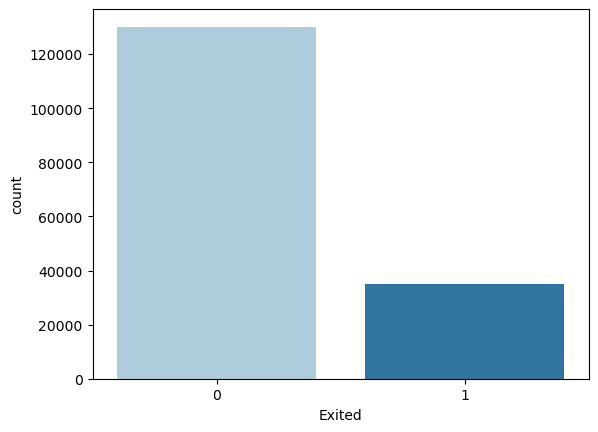

In [416]:
#Count plot figure , visualize class balance
sns.countplot(x='Exited', data=df, palette='Paired')

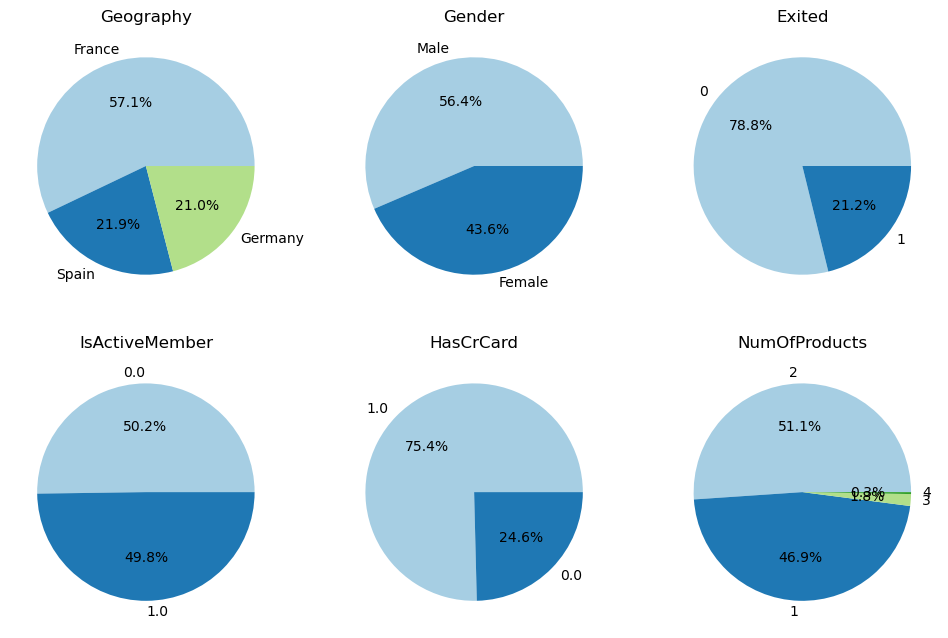

In [417]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['Geography', 'Gender','Exited','IsActiveMember','HasCrCard','NumOfProducts']):
    plt.subplot(3,3,i+1)
    x=df[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%",colors=sns.color_palette('Paired'))

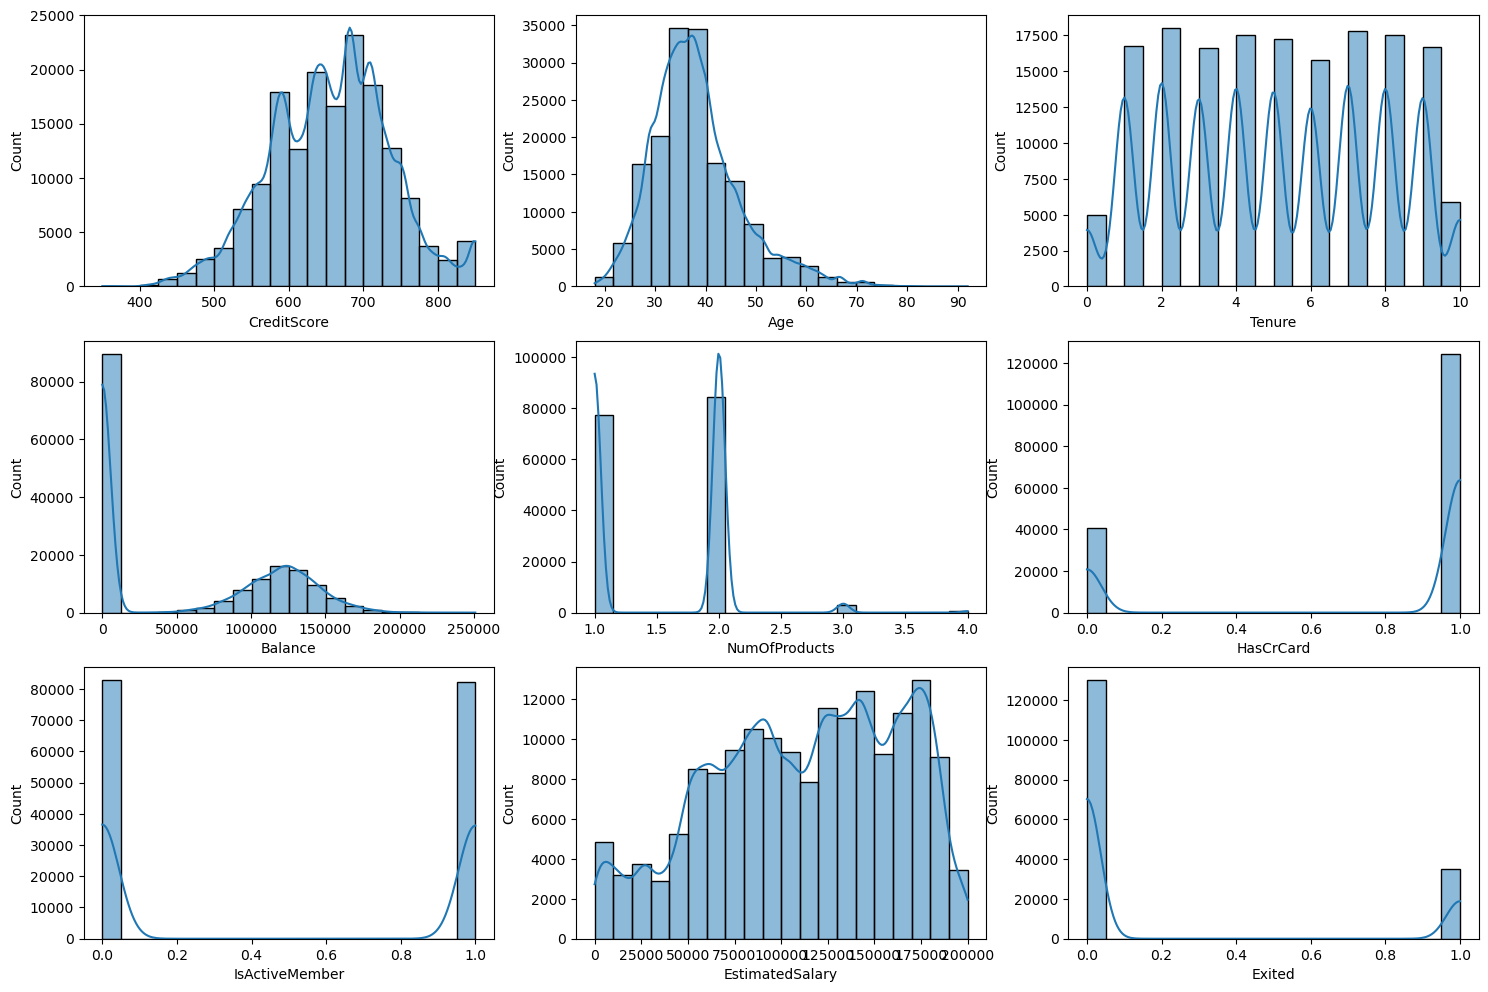

In [418]:
numerical_cols= ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']

plt.figure(figsize=(18,12))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df,
                    x=col,
                    bins=20,
                    kde=True)

<Axes: xlabel='Exited', ylabel='Balance'>

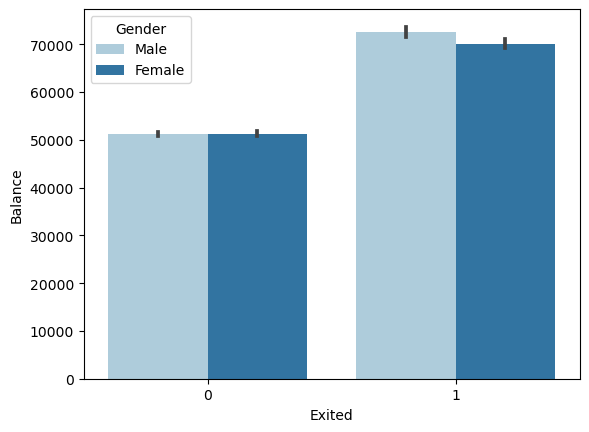

In [419]:
sns.barplot(data=df,x=df.Exited,y=df.Balance,hue="Gender",palette=sns.color_palette(palette='Paired'))

<Axes: xlabel='Geography', ylabel='count'>

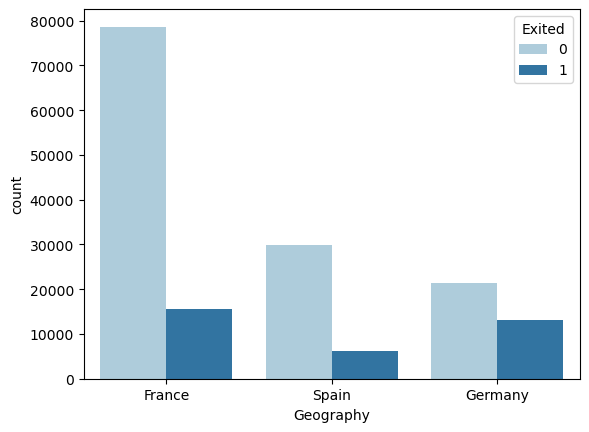

In [420]:
sns.countplot(data=df,x=df.Geography,hue=df.Exited,palette=sns.color_palette(palette='Paired'))

<Axes: xlabel='IsActiveMember', ylabel='count'>

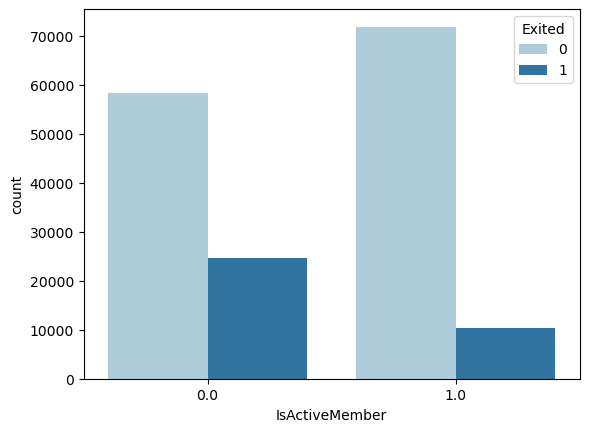

In [421]:
sns.countplot(data=df,x=df.IsActiveMember,hue="Exited",palette=sns.color_palette(palette='Paired'))

In [422]:
#Drop not needed features
df= df.drop(['id','CustomerId','Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [423]:
#Convert F/M to 0/1 
df['Gender']= df['Gender'].map({'Male':1, 'Female':0})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [424]:
#One hot encoding for countries in geography 
df = pd.get_dummies(df, columns=['Geography'], dtype=int)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


<Axes: >

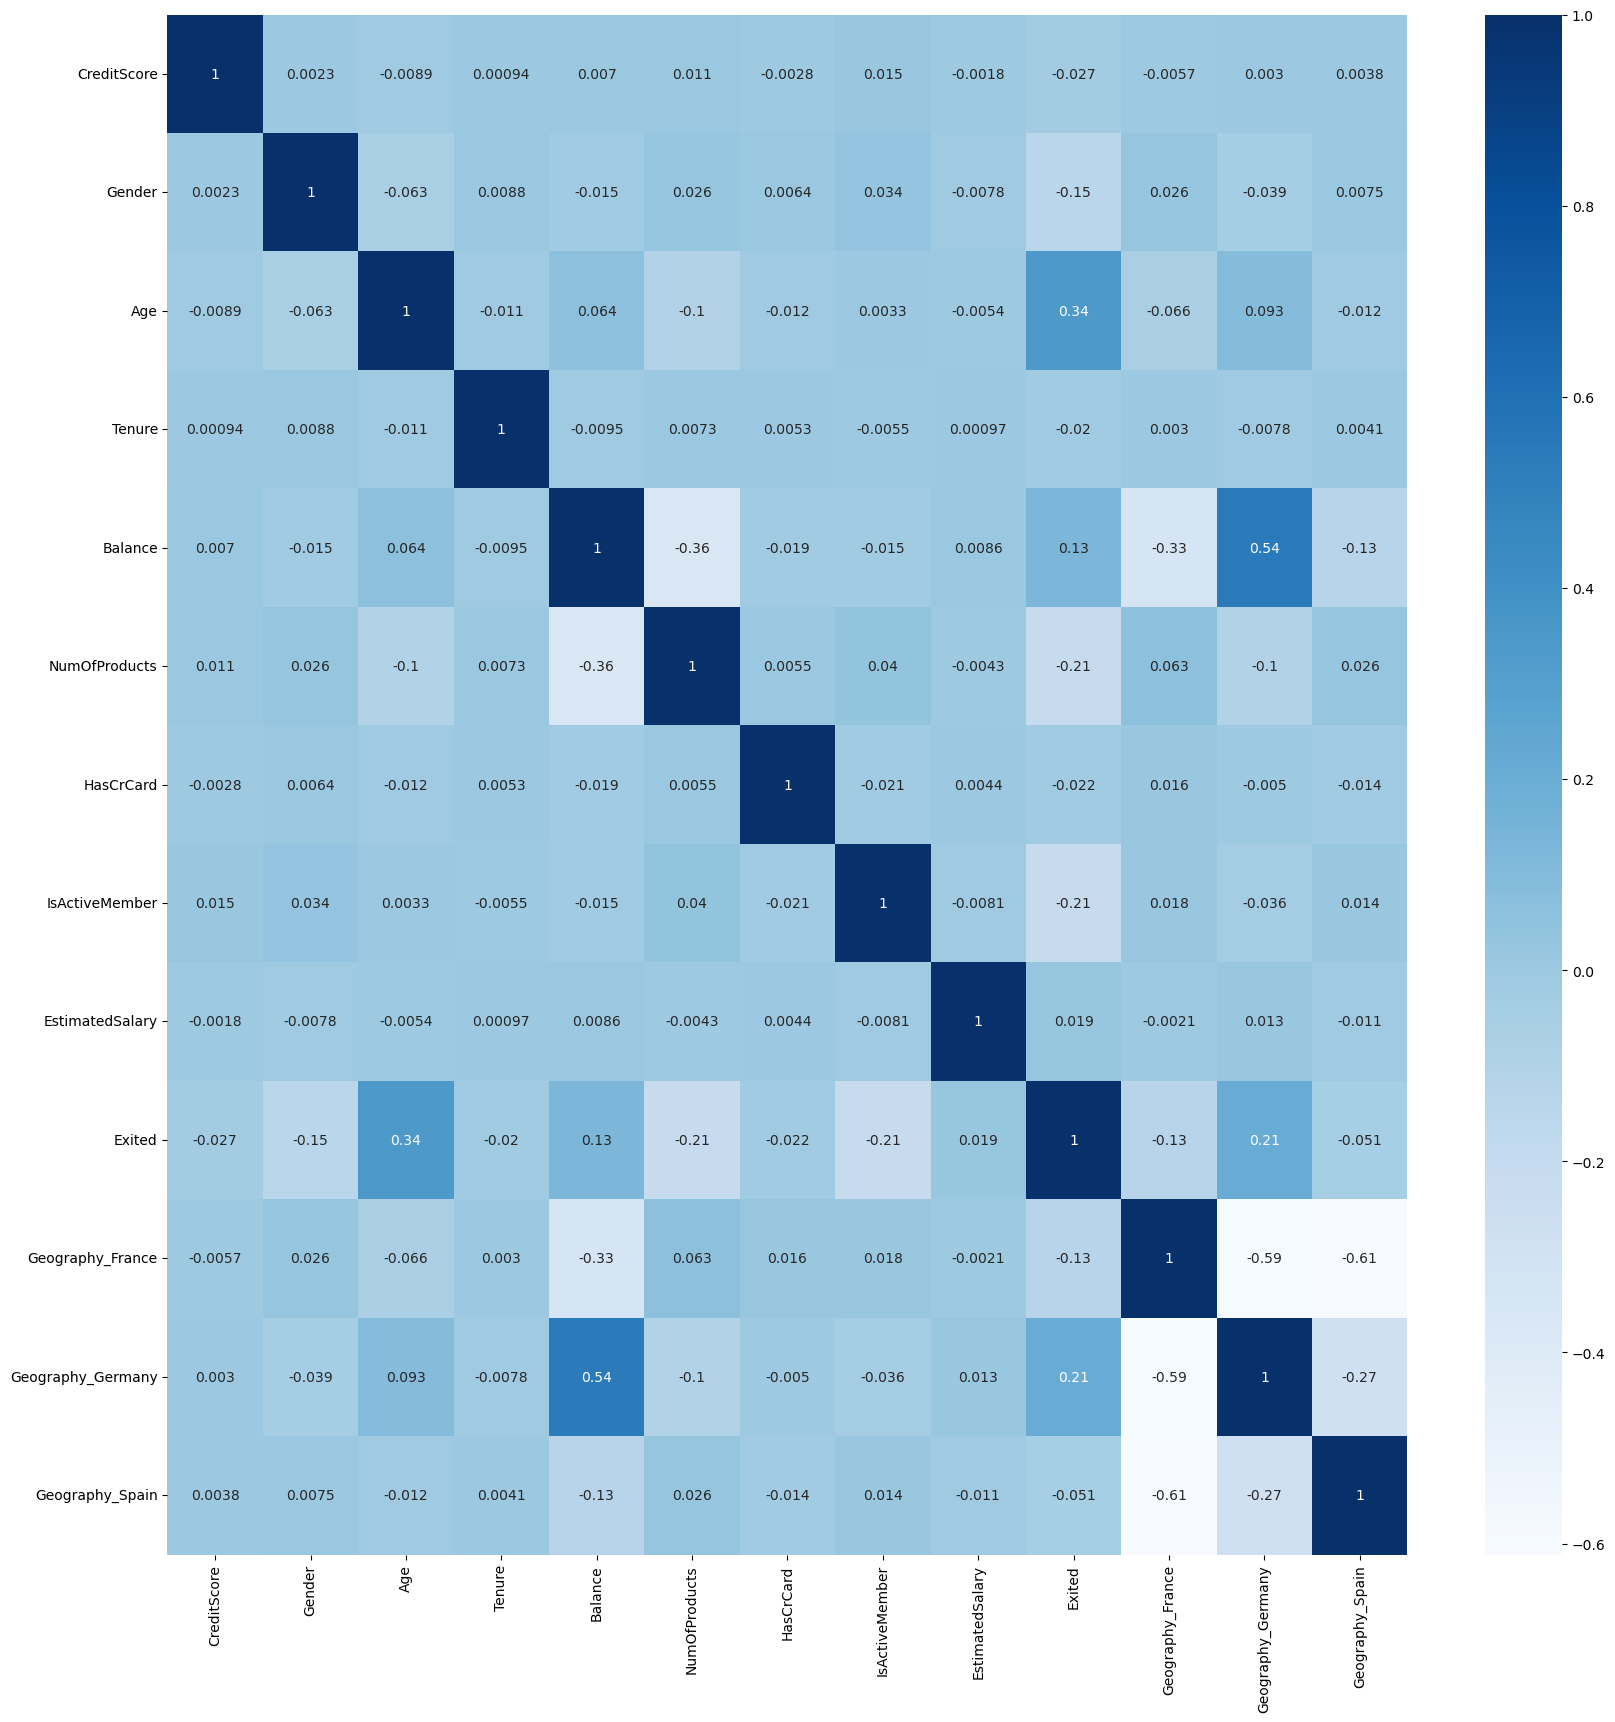

In [425]:
#Correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [426]:
#Copying Data Frame for future use
df2= df

# Splitting the data

In [427]:
#Split to x,y
X = df.drop(columns='Exited', axis=1) #Inputs
Y = df['Exited'] #Target variable 

In [428]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1


In [429]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [430]:
#Splitting data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)

In [431]:
print('For X:', X_train.shape, X_val.shape)
print('For Y:', Y_train.shape, Y_val.shape)

For X: (148530, 12) (16504, 12)
For Y: (148530,) (16504,)


# Models

### 1) Random Forest
1: Without feature engineering and with the default parameters

In [432]:
model_rf1 = RandomForestClassifier()
model_rf1.fit(X_train, Y_train)

RandomForestClassifier()

In [433]:
y_pred_rf1 = model_rf1.predict(X_val)

In [434]:
#Accuracy & AUC
accuracy = accuracy_score(y_pred_rf1, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_rf1)
print('AUC:', auc)

Accuracy: 85.87615123606398
AUC: 0.7420821611841953


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

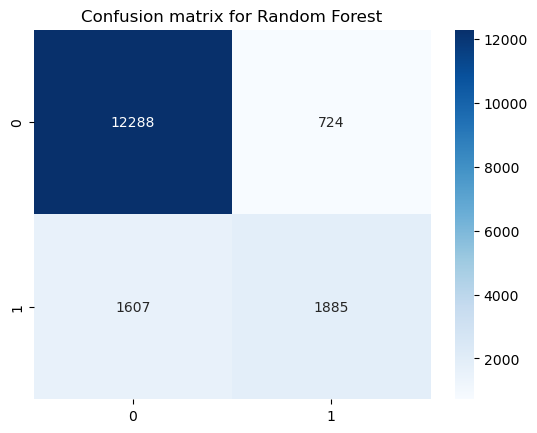

In [435]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_rf1)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Random Forest")

In [436]:
print(classification_report(Y_val, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13012
           1       0.72      0.54      0.62      3492

    accuracy                           0.86     16504
   macro avg       0.80      0.74      0.77     16504
weighted avg       0.85      0.86      0.85     16504



#### 1) Random Forest
2: With hyper-tuning parameters and without feature engineering

In [437]:
# # Create the base random forest model
# model_rf2 = RandomForestClassifier()

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [7,10,20],      # Maximum depth of each tree
#     'min_samples_split': [2, 5, 7]   # Minimum samples required to split a node
# }

# # Perform grid search
# grid_search_rf2 = GridSearchCV(estimator=model_rf2, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search_rf2.fit(X_train, Y_train)

# best_params = grid_search_rf2.best_params_
# best_score = grid_search_rf2.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy Score:", best_score)

#Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
#Best Accuracy Score: 0.8843225765880236

In [438]:
model_rf2 = RandomForestClassifier(n_estimators=300, max_depth= 20, min_samples_split= 5)
model_rf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300)

In [439]:
y_pred_rf2 = model_rf2.predict(X_val)

In [440]:
#Accuracy & AUC
accuracy = accuracy_score(y_pred_rf2, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_rf2)
print('AUC:', auc)

Accuracy: 86.33058652447892
AUC: 0.7465354916019012


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

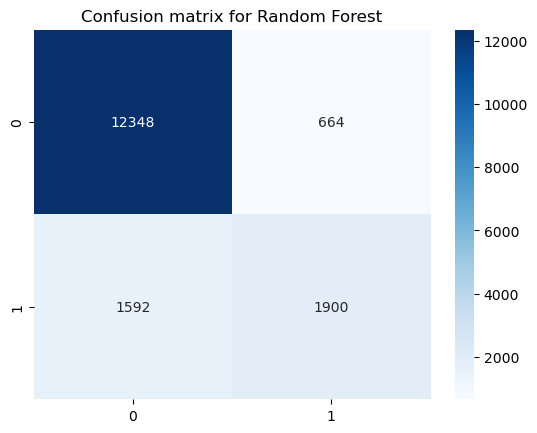

In [441]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_rf2)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Random Forest")

In [442]:
print(classification_report(Y_val, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13012
           1       0.74      0.54      0.63      3492

    accuracy                           0.86     16504
   macro avg       0.81      0.75      0.77     16504
weighted avg       0.86      0.86      0.86     16504



#### 2) Light GBM 
1: Without feature engineering and with the default parameters

In [443]:
lgb_model1 = lgb.LGBMClassifier()
lgb_model1.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 31429, number of negative: 117101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 148530, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211600 -> initscore=-1.315306
[LightGBM] [Info] Start training from score -1.315306


LGBMClassifier()

In [444]:
y_pred_lgb1=lgb_model1.predict(X_val)

In [445]:
accuracy = accuracy_score(y_pred_lgb1, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_lgb1)
print('AUC:', auc)

Accuracy: 86.62748424624334
AUC: 0.7539705616702742


Text(0.5, 1.0, 'Confusion matrix for Light GBM')

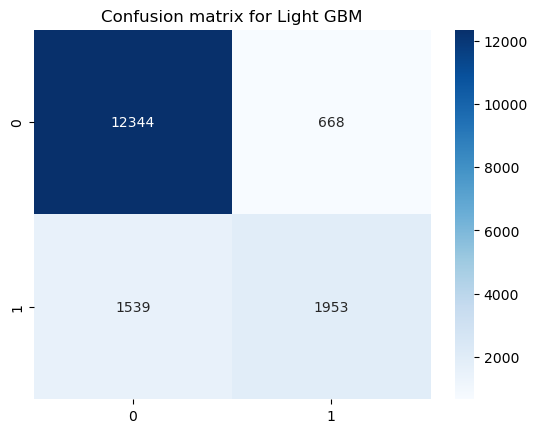

In [446]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_lgb1)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Light GBM")

In [447]:
print(classification_report(Y_val, y_pred_lgb1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13012
           1       0.75      0.56      0.64      3492

    accuracy                           0.87     16504
   macro avg       0.82      0.75      0.78     16504
weighted avg       0.86      0.87      0.86     16504



### 2) Light GBM 
2: With hyper-tuning parameters and without feature engineering

In [448]:
# #Define your LightGBM model
# lgb_model2 = lgb.LGBMClassifier()

# #Define the grid of hyperparameters to search over
# param_grid = {
#     'boosting_type': ['gbdt', 'dart'],
#     'learning_rate': [0.005, 0.01, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
# }

# #Perform grid search
# grid_search_lgb2 = GridSearchCV(estimator=lgb_model2, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search_lgb2.fit(X_train, Y_train)

# #Get the best parameters and the best score
# best_params = grid_search_lgb2.best_params
# bestscore = grid_search_lgb2.best_score

# print("Best Parameters:", best_params)
# print("Best Accuracy Score:", bestscore)

# #Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
# #Best Accuracy Score: 0.9125587587091423

In [449]:
lgb_model2 = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, max_depth= 5, n_estimators= 300)
lgb_model2.fit(X_train, Y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 31429, number of negative: 117101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 148530, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211600 -> initscore=-1.315306
[LightGBM] [Info] Start training from score -1.315306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

LGBMClassifier(max_depth=5, n_estimators=300)

In [450]:
y_pred_lgb2=lgb_model2.predict(X_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [451]:
accuracy = accuracy_score(y_pred_lgb2, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_lgb2)
print('AUC:', auc)

Accuracy: 86.68807561803199
AUC: 0.7561357143586553


Text(0.5, 1.0, 'Confusion matrix for Light GBM')

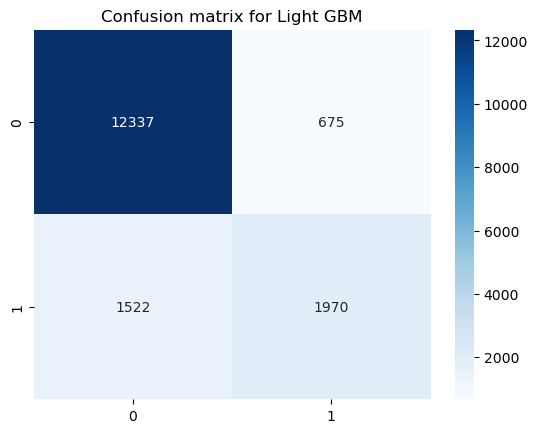

In [452]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_lgb2)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Light GBM")

In [453]:
print(classification_report(Y_val, y_pred_lgb2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13012
           1       0.74      0.56      0.64      3492

    accuracy                           0.87     16504
   macro avg       0.82      0.76      0.78     16504
weighted avg       0.86      0.87      0.86     16504



### 3) XgBoost
1: Without feature engineering and with the default parameters

In [454]:
model_XGB1 = XGBClassifier()
model_XGB1.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [455]:
y_pred_XGB1 = model_XGB1.predict(X_val)

In [456]:
accuracy = accuracy_score(y_pred_XGB1, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_XGB1)
print('AUC:', auc)

Accuracy: 86.46388754241397
AUC: 0.7512569241750237


Text(0.5, 1.0, 'Confusion matrix for XgBoost')

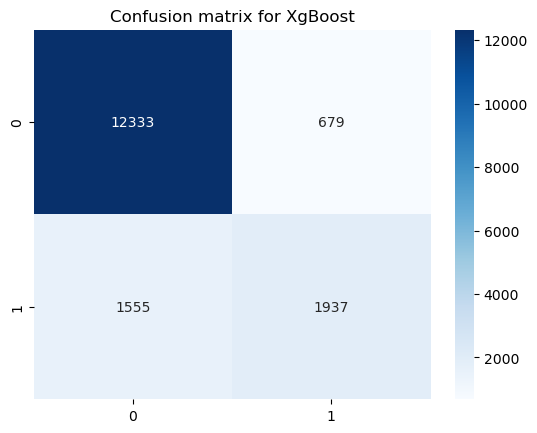

In [457]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_XGB1)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for XgBoost")

In [458]:
print(classification_report(Y_val, y_pred_XGB1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13012
           1       0.74      0.55      0.63      3492

    accuracy                           0.86     16504
   macro avg       0.81      0.75      0.78     16504
weighted avg       0.86      0.86      0.86     16504



#### 3) XGBoost
2: With hyper-tuning parameters and without feature engineering

In [459]:
# model_XGB2 = lgb.LGBMClassifier()

# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'subsample': [0.5, 0.7, 1],
#     'gamma': [0.5, 1, 1.5, 2, 5],
# }

# #Perform grid search
# grid_search_XGB2 = GridSearchCV(estimator=model_XGB2, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search_XGB2.fit(X_train, Y_train)

# #Get the best parameters and the best score
# best_params = grid_search_XGB2.best_params_
# bestscore = grid_search_XGB2.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy Score:", bestscore)

# #Best Parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5}
# #Best Accuracy Score: 0.8654951861576786

In [460]:
model_XGB2 = XGBClassifier(gamma= 0.5, learning_rate= 0.1, max_depth= 7, subsample= 0.5)
model_XGB2.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [461]:
y_pred_XGB2 = model_XGB2.predict(X_val)

In [462]:
accuracy = accuracy_score(y_pred_XGB2, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_XGB2)
print('AUC:', auc)

Accuracy: 86.55477460009695
AUC: 0.7531951737914672


Text(0.5, 1.0, 'Confusion matrix for XgBoost')

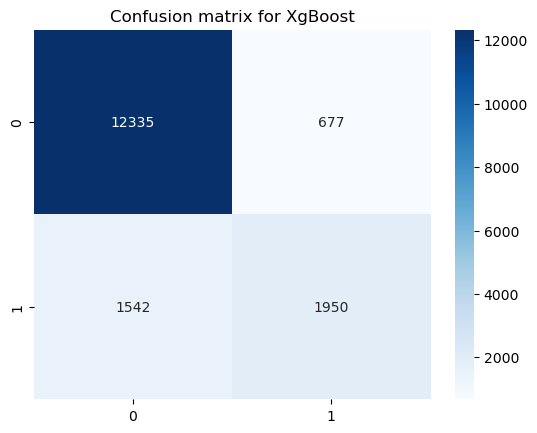

In [463]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_XGB2)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for XgBoost")

In [464]:
print(classification_report(Y_val, y_pred_XGB2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13012
           1       0.74      0.56      0.64      3492

    accuracy                           0.87     16504
   macro avg       0.82      0.75      0.78     16504
weighted avg       0.86      0.87      0.86     16504



-----------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------

# Feature Engineering

In [465]:
df2['ZeroBalance'] = df2['Balance'].apply(lambda x: 1 if x == 0 else 0)
df2['IsSenior'] = df2['Age'].apply(lambda x: 1 if x >= 60 else 0)
#df2['AgeCat'] = np.round(df2.Age/20).astype('int')
df2['IsActive_by_CreditCard'] = df2['HasCrCard'] * df2['IsActiveMember']
df2['ActiveMem_noProducts'] = df2['NumOfProducts'] * df2['IsActiveMember']
df2['Credit_per_tenure'] = df2['Tenure'] / df2['CreditScore']
df2['Salary_per_tenure'] = df2['Tenure'] / df2['EstimatedSalary']
df2['Salary_Age_ratio'] = df2['EstimatedSalary'] / df2['Age']
df2['Balance_Age_Ratio'] = df2['Balance'] / df2['Age']
df2['Balance_Salary_Ratio'] = df2['Balance'] / df2['EstimatedSalary']
df2['Products_Per_Tenure'] =  df2['Tenure'] / df2['NumOfProducts']
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,ZeroBalance,IsSenior,IsActive_by_CreditCard,ActiveMem_noProducts,Credit_per_tenure,Salary_per_tenure,Salary_Age_ratio,Balance_Age_Ratio,Balance_Salary_Ratio,Products_Per_Tenure
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,...,1,0,0.0,0.0,0.004491,0.000017,5498.483939,0.000000,0.000000,1.5
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,...,1,0,1.0,2.0,0.001595,0.000020,1500.106061,0.000000,0.000000,0.5
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,...,1,0,0.0,0.0,0.014749,0.000054,4621.667250,0.000000,0.000000,5.0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,...,0,0,1.0,1.0,0.003442,0.000024,2487.084706,4378.898235,1.760655,2.0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,...,1,0,1.0,2.0,0.006983,0.000332,456.631212,0.000000,0.000000,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,...,1,0,1.0,1.0,0.002999,0.000015,3994.992424,0.000000,0.000000,2.0
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,...,1,0,0.0,0.0,0.003788,0.000023,3766.698571,0.000000,0.000000,3.0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,...,1,0,1.0,1.0,0.008850,0.000039,4110.630968,0.000000,0.000000,5.0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,...,0,0,0.0,1.0,0.012635,0.000098,2372.434333,5384.433333,2.269582,7.0


<Axes: >

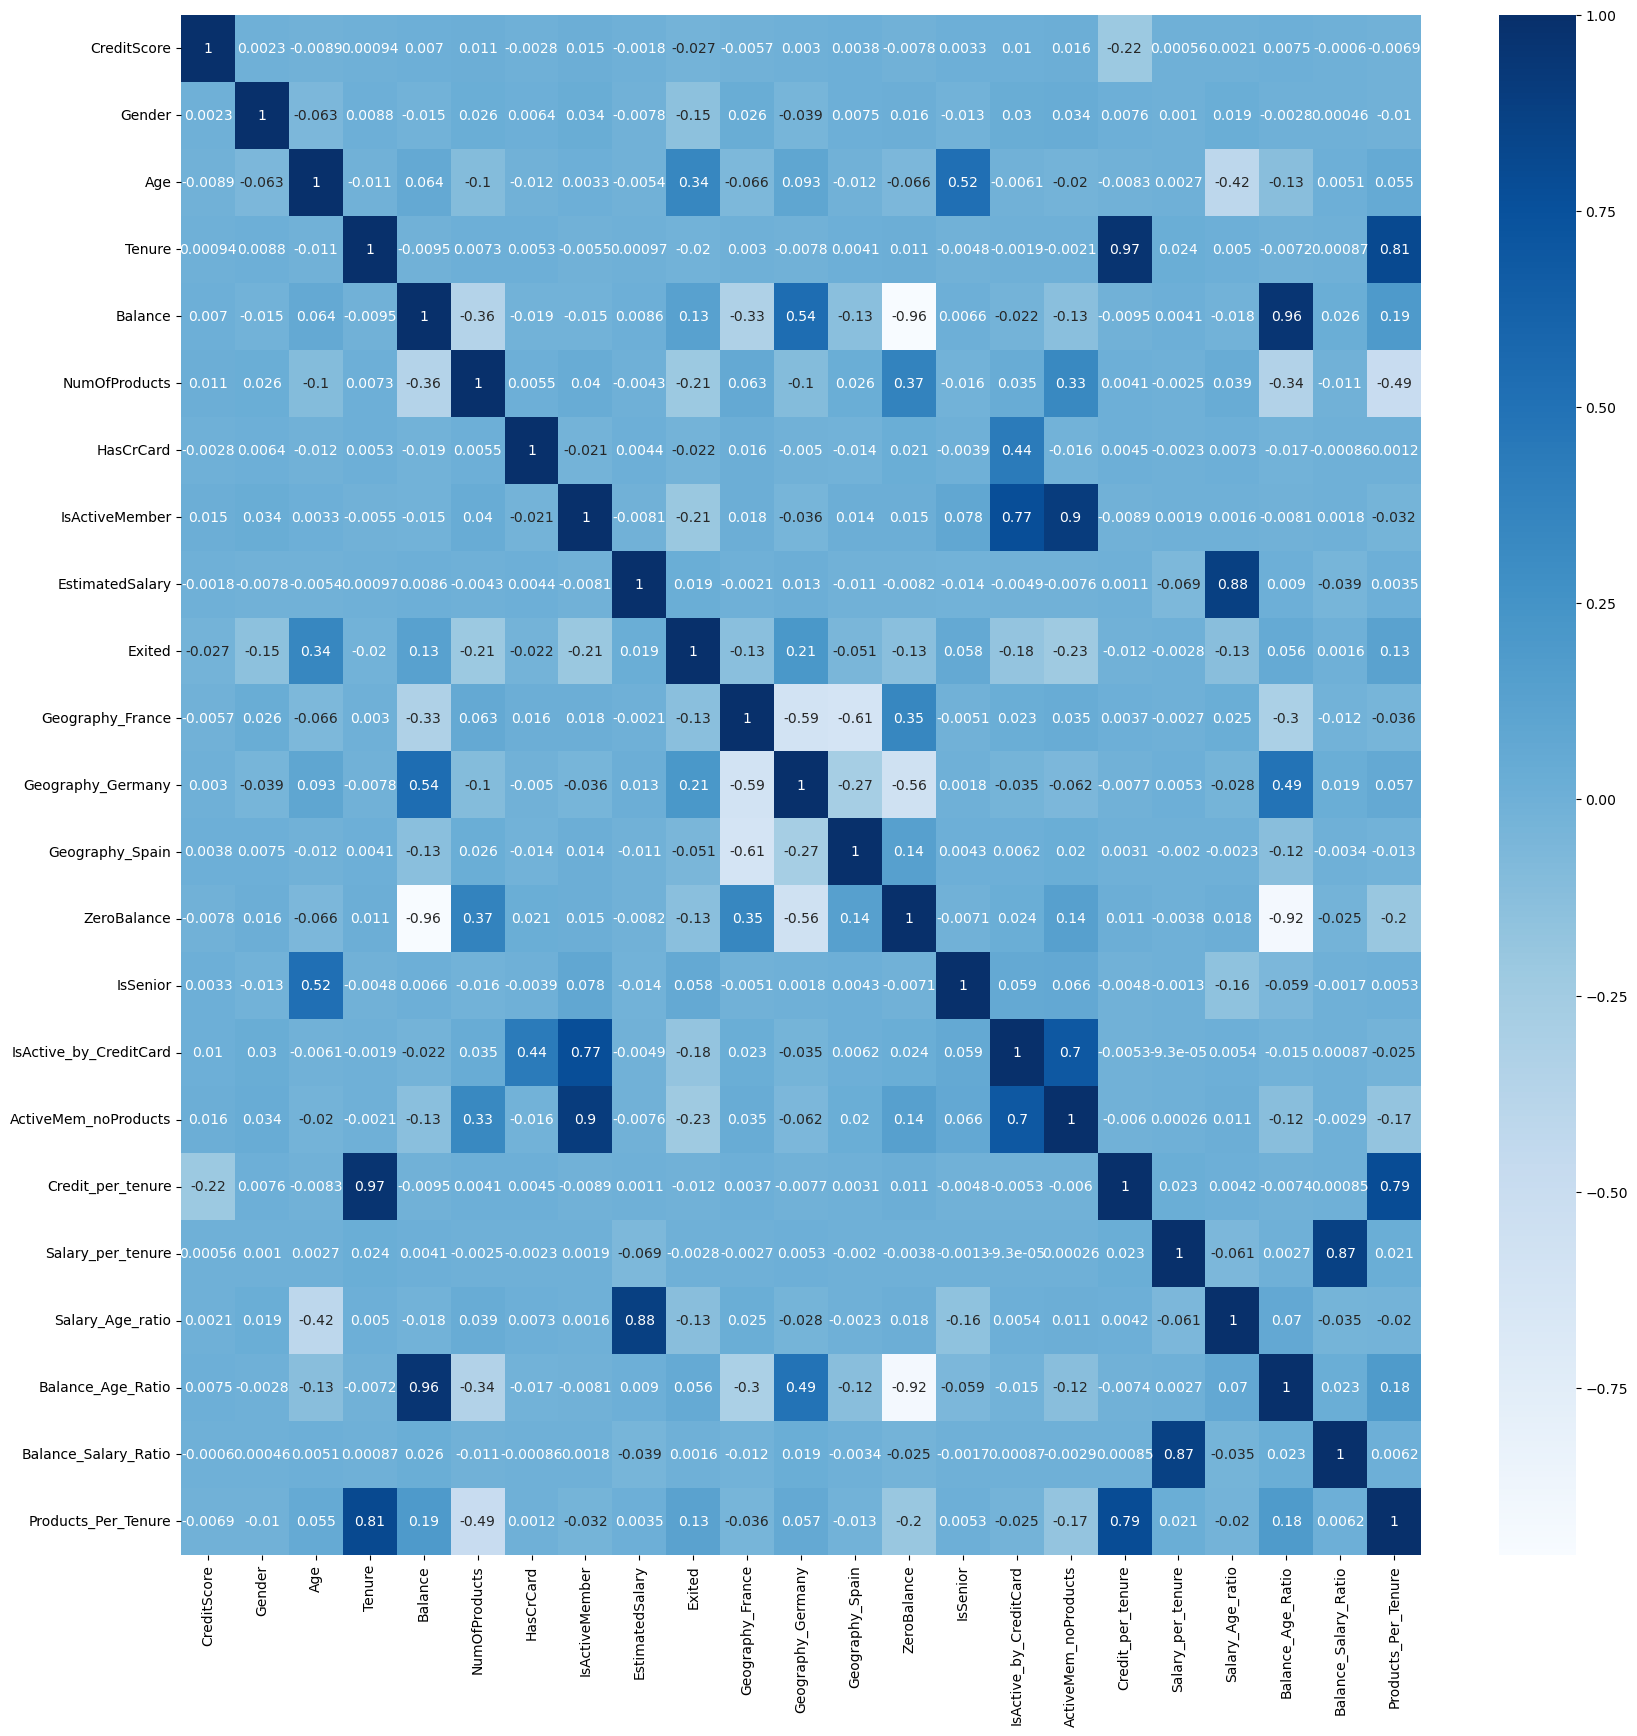

In [466]:
#Draw the heatmap again, with the new correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), annot=True, cmap='Blues')

# Split data and up-sample

In [467]:
#Split to x,y
X = df2.drop(columns='Exited', axis=1) #Inputs
Y = df2['Exited'] #Target variable 

In [468]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,...,ZeroBalance,IsSenior,IsActive_by_CreditCard,ActiveMem_noProducts,Credit_per_tenure,Salary_per_tenure,Salary_Age_ratio,Balance_Age_Ratio,Balance_Salary_Ratio,Products_Per_Tenure
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,1,...,1,0,0.0,0.0,0.004491,0.000017,5498.483939,0.000000,0.000000,1.5
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,1,...,1,0,1.0,2.0,0.001595,0.000020,1500.106061,0.000000,0.000000,0.5
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,1,...,1,0,0.0,0.0,0.014749,0.000054,4621.667250,0.000000,0.000000,5.0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,1,...,0,0,1.0,1.0,0.003442,0.000024,2487.084706,4378.898235,1.760655,2.0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,...,1,0,1.0,2.0,0.006983,0.000332,456.631212,0.000000,0.000000,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,...,1,0,1.0,1.0,0.002999,0.000015,3994.992424,0.000000,0.000000,2.0
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,1,...,1,0,0.0,0.0,0.003788,0.000023,3766.698571,0.000000,0.000000,3.0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,1,...,1,0,1.0,1.0,0.008850,0.000039,4110.630968,0.000000,0.000000,5.0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,...,0,0,0.0,1.0,0.012635,0.000098,2372.434333,5384.433333,2.269582,7.0


In [469]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [470]:
#Up sample the minority class to achieve a balance 
no_exit = df2[df2.Exited == 0]

# Initialize the SMOTE with specific sampling strategy
smote = SMOTE(sampling_strategy={1: len(no_exit)}, random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Print the class distribution after resampling
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Resampled dataset shape: Counter({0: 130113, 1: 130113})


In [471]:
#Splitting data
X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, stratify=y_resampled, random_state=42)

In [472]:
print('For X:', X_train.shape, X_val.shape)
print('For Y:', Y_train.shape, Y_val.shape)

For X: (234203, 22) (26023, 22)
For Y: (234203,) (26023,)


# Modelling

#### 1) Random Forest
3: With feature engineering, up-sampling, tuning hyper-parameters

In [473]:
model_rf3 = RandomForestClassifier(n_estimators=300, max_depth= 20, min_samples_split= 5)

# # Initialize k-fold cross-validation
# k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Perform k-fold cross-validation
# cv_scores = cross_val_score(model_rf3, X_train, Y_train, cv=k_fold)

# # Print the cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("Average accuracy:", cv_scores.mean())

model_rf3.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300)

In [474]:
y_pred_rf3 = model_rf3.predict(X_val)

In [475]:
#Accuracy & AUC
accuracy = accuracy_score(y_pred_rf3, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_rf3)
print('AUC:', auc)

Accuracy: 90.67747761595511
AUC: 0.9067741794447003


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

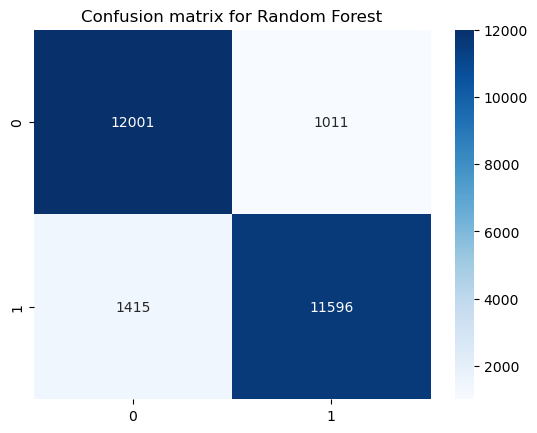

In [476]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_rf3)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Random Forest")

In [477]:
print(classification_report(Y_val, y_pred_rf3))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     13012
           1       0.92      0.89      0.91     13011

    accuracy                           0.91     26023
   macro avg       0.91      0.91      0.91     26023
weighted avg       0.91      0.91      0.91     26023



#### 2) Light GBM
3: With feature engineering, up-sampling, and tuning hyper-parameters

In [478]:
lgb_model3 = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate= 0.1, max_depth= 5, n_estimators= 300)

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(lgb_model3, X_train, Y_train, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

lgb_model3.fit(X_train, Y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 93744, number of negative: 93618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3598
[LightGBM] [Info] Number of data points in the train set: 187362, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500336 -> initscore=0.001345
[LightGBM] [Info] Start training from score 0.001345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

LGBMClassifier(max_depth=5, n_estimators=300)

In [479]:
y_pred_lgb3=lgb_model3.predict(X_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [480]:
accuracy = accuracy_score(y_pred_lgb3, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_lgb3)
print('AUC:', auc)

Accuracy: 91.43065749529262
AUC: 0.9143055411530402


Text(0.5, 1.0, 'Confusion matrix for Light GBM')

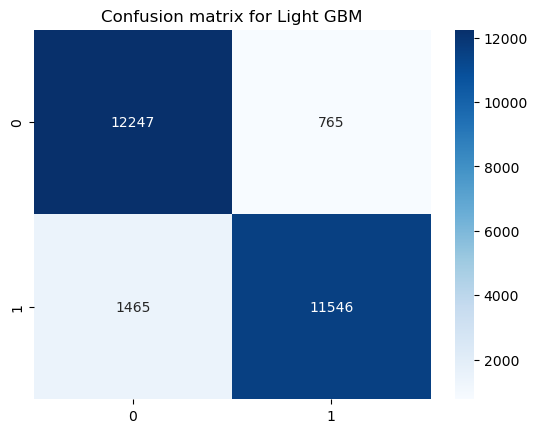

In [481]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_lgb3)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for Light GBM")

In [482]:
print(classification_report(Y_val, y_pred_lgb3))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     13012
           1       0.94      0.89      0.91     13011

    accuracy                           0.91     26023
   macro avg       0.92      0.91      0.91     26023
weighted avg       0.92      0.91      0.91     26023



#### 3) XGBoost
With feature engineering, up-sampling, and tuning hyper-parameters

In [483]:
model_XGB3 = XGBClassifier(gamma= 0.5, learning_rate= 0.1, max_depth= 7, subsample= 0.5)

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(model_XGB3, X_resampled, y_resampled, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

model_XGB3.fit(X_train, Y_train)

Cross-validation scores: [0.91036775 0.90944375 0.90827169 0.90967432 0.90940532]
Average accuracy: 0.9094325665568197


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [484]:
y_pred_XGB3 = model_XGB3.predict(X_val)

In [485]:
accuracy = accuracy_score(y_pred_XGB3, Y_val)*100
print("Accuracy:", accuracy)
auc = roc_auc_score(Y_val, y_pred_XGB3)
print('AUC:', auc)

Accuracy: 91.00411174730047
AUC: 0.910040141257192


Text(0.5, 1.0, 'Confusion matrix for XgBoost')

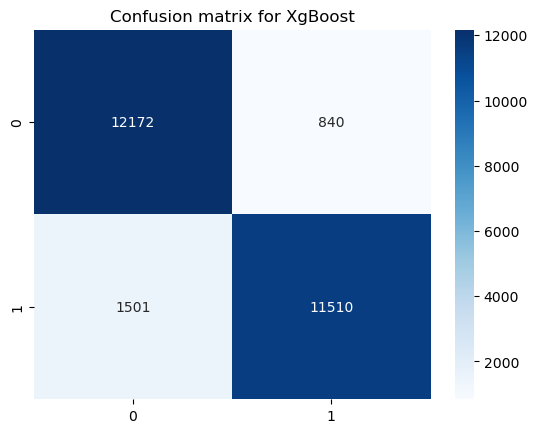

In [486]:
#Draw confusion matrix
cm=confusion_matrix(Y_val,y_pred_XGB3)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.title("Confusion matrix for XgBoost")

In [487]:
print(classification_report(Y_val, y_pred_XGB3))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     13012
           1       0.93      0.88      0.91     13011

    accuracy                           0.91     26023
   macro avg       0.91      0.91      0.91     26023
weighted avg       0.91      0.91      0.91     26023



In [488]:
dump(lgb_model3, 'lgb_model3.joblib')

['lgb_model3.joblib']